# Importing Libraries

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv("/content/advertising.csv")

## Data Overview

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
df.shape

(200, 4)

## Column Information

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Finding Missing Values

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Caluclate the individual values of dataset

In [15]:
df['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

In [14]:
df['Radio'].value_counts()

Radio
4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: count, Length: 167, dtype: int64

In [13]:
df['Newspaper'].value_counts()

Newspaper
9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: count, Length: 172, dtype: int64

In [12]:
df['Sales'].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

# Plotting HistPlot

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

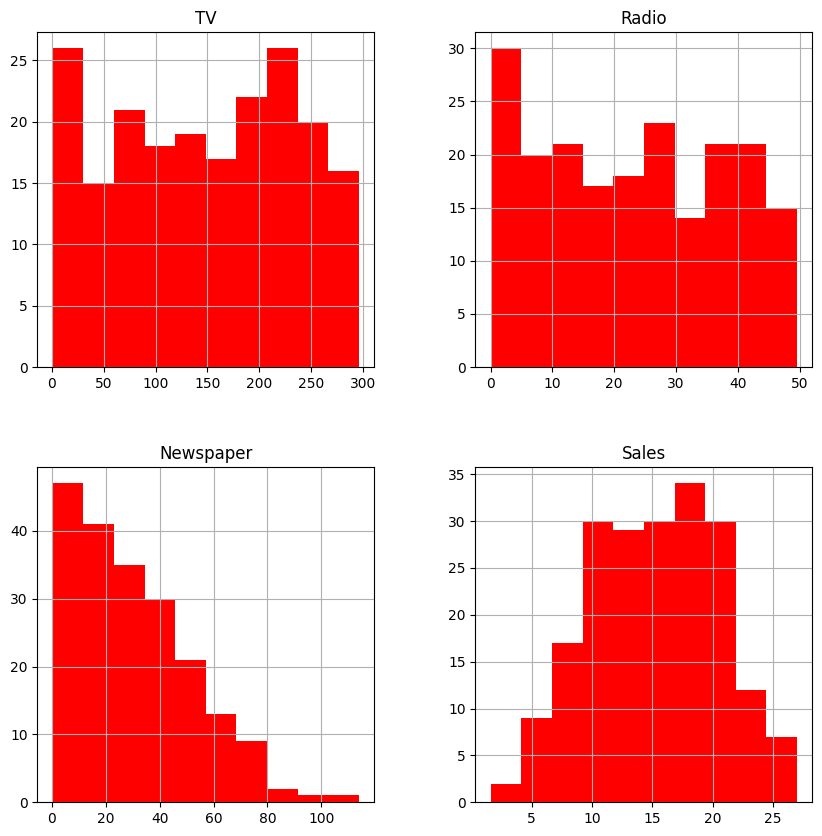

In [16]:
df.hist(figsize=(10,10),color='red')

# Plotting PairPlot

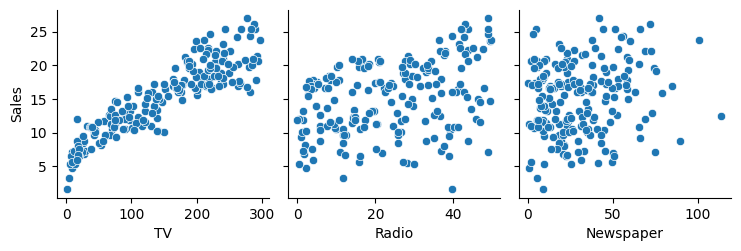

In [18]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter') # Changed 'Kind' to 'kind'
plt.show()

# Plotting Correlation

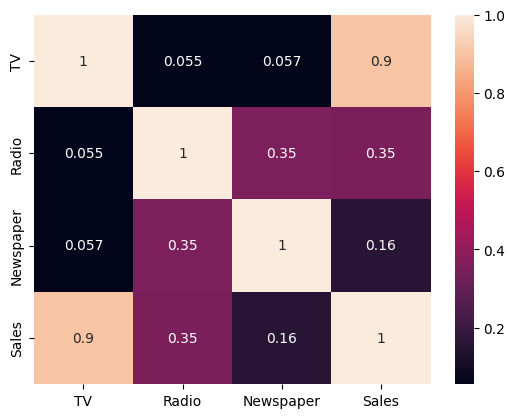

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**SALES IS HIGHLY CORRELATED WITH THE TV**

### Training Model using linear regression as it is coorelated with only one variable TV

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df[['TV']],df.Sales,test_size=0.2,random_state=42)

In [22]:
x_train

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [23]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
res=lr.predict(x_test)
print(res)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [26]:
lr.coef_

array([0.05548294])

In [27]:
lr.intercept_

7.007108428241848

In [28]:
0.05473199*69.2+7.14382225

10.931275958

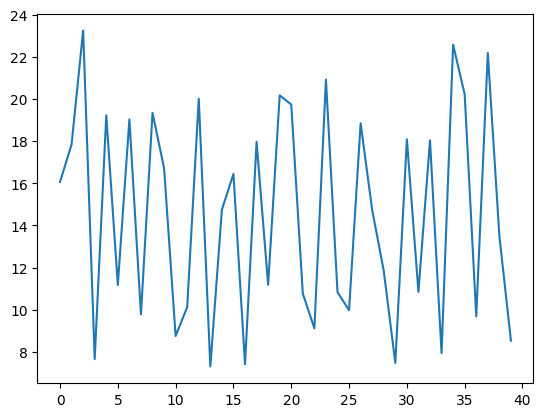

In [29]:
plt.plot(res)

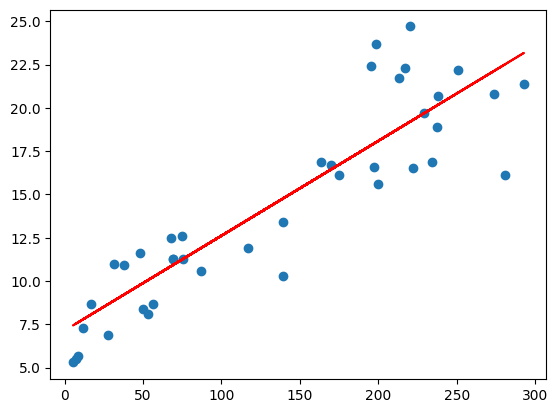

In [31]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.14382225+0.05473199*x_test,'r')
plt.show()

***Concluding with saying that above mention solution is successfullly able to predict the sales using advertising plateform Datasets***